In [120]:
import os
import sys
import csv
import re
import math
import pandas as pd
import os
import seaborn as sns
from glob import glob
# import pdb

import librosa
import os
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib.style as ms
from tqdm import tqdm
import pickle

from moviepy.editor import *

import IPython.display
import librosa.display
ms.use('seaborn-muted')
%matplotlib inline


In [151]:
df_iemocap = pd.read_csv("../small_data/preprocessed_data/df_iemocap.csv")

In [152]:
df_iemocap.head()

,start_time,end_time,file_path,emotion,session,sex
0,6.2901,8.2357,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,neu,0,F
1,10.0100,11.3925,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,neu,0,F
2,14.8872,18.0175,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,neu,0,F
3,19.2900,20.7875,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,xxx,0,F
4,21.3257,24.7400,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,xxx,0,F


In [155]:
set(df_iemocap.sex)

{'F', 'M'}

In [159]:
df_ravdess = pd.read_csv('../small_data/preprocessed_data/df_ravdess.csv')

In [160]:
df_ravdess.head()

,file_path,emotion,actor,sex
0,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,hap,10,F
1,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,hap,10,F
2,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,calm,10,F
3,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,neu,10,F
4,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,calm,10,F


In [163]:
df_enterface = pd.read_csv('../small_data/preprocessed_data/df_enterface.csv')

In [164]:
df_enterface.head()

,file_path,emotion,subject
0,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,fea,2
1,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,fea,2
2,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,fea,2
3,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,fea,2
4,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,fea,2


In [167]:
df_iemocap.file_path[4]

'/Users/grigorkeropyan/Desktop/YSU_thesis/small_data/IEMOCAP_full_release/Session1/sentences_video_audio/Ses01F_impro01/Ses01F_impro01_F004.mp4'

In [168]:
df_ravdess.file_path[4]

'/Users/grigorkeropyan/Desktop/YSU_thesis/small_data/RAVDESS/Actor_10/01-01-02-01-02-02-10.mp4'

In [169]:
df_enterface.file_path[4]

'/Users/grigorkeropyan/Desktop/YSU_thesis/small_data/enterface_database/subject 2/fear/sentence 3/s2_fe_3.avi'

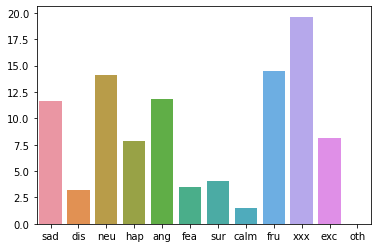

In [130]:
ems = {
    'sad': 1491,
    'dis': 409,
    'neu': 1804,
    'hap': 999,
    'ang': 1510,
    'fea': 447,
    'sur': 514,
    'calm': 192,
    'fru': 1849,
    'xxx': 2507,
    'exc': 1041,
    'oth': 3
}
sns.barplot(list(ems.keys()), np.array(list(ems.values()))*100/sum(list(ems.values())))

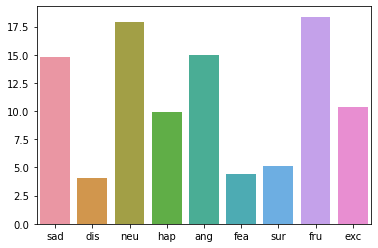

In [129]:
ems = {
    'sad': 1491,
    'dis': 409,
    'neu': 1804,
    'hap': 999,
    'ang': 1510,
    'fea': 447,
    'sur': 514,
#     'calm': 192,
    'fru': 1849,
#     'xxx': 2507,
    'exc': 1041,
#     'oth': 3
}
sns.barplot(list(ems.keys()), np.array(list(ems.values()))*100/sum(list(ems.values())))

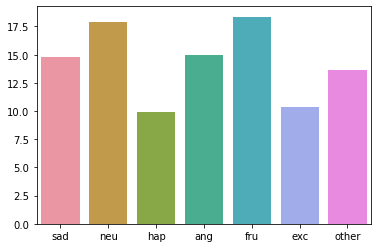

In [132]:
ems = {
    'sad': 1491,
#     'dis': 409,
    'neu': 1804,
    'hap': 999,
    'ang': 1510,
#     'fea': 447,
#     'sur': 514,
    'fru': 1849,
    'exc': 1041,
    'other': 3 + 514 + 447 + 409
}
sns.barplot(list(ems.keys()), np.array(list(ems.values()))*100/sum(list(ems.values())))

In [142]:
aa = list(df_enterface.emotion)

In [148]:
type(list(map(str, aa))[0])

str

In [185]:
path = "/Users/grigorkeropyan/Desktop/YSU_thesis/small_data/back/iemocap/Session1/sentences_video_audio/Ses01F_impro01/Ses01F_impro01_F011.mp4"

In [186]:
vid = VideoFileClip(path)

In [187]:
vid.write_videofile("vvvv.mp4",
                    codec='libx264',
                    audio_codec='aac',
                    temp_audiofile='temp-audio.m4a',
                    remove_temp=True)

t:   0%|          | 0/295 [00:00<?, ?it/s, now=None]                

Moviepy - Building video vvvv.mp4.
MoviePy - Writing audio in temp-audio.m4a
MoviePy - Done.
Moviepy - Writing video vvvv.mp4



Moviepy - Done !
Moviepy - video ready vvvv.mp4


In [188]:
length = vid.duration

In [189]:
int(length//3)

3

In [192]:
length

9.84

In [195]:
for i in range(int(length//3)):
    vi = vid.subclip(3*i, 3*i + 3)
    vi.write_videofile("v" + str(i) + ".mp4",
                    codec='libx264',
                    audio_codec='aac',
                    temp_audiofile='temp-audio.m4a',
                    remove_temp=True)
if length > 3*int(length//3) + 0.9:
    vi = vid.subclip(3*int(length//3))
    vi.write_videofile("v" + ".mp4",
                        codec='libx264',
                        audio_codec='aac',
                        temp_audiofile='temp-audio.m4a',
                        remove_temp=True)

t:  59%|█████▉    | 53/90 [00:00<00:00, 525.11it/s, now=None]

Moviepy - Building video v0.mp4.
MoviePy - Writing audio in temp-audio.m4a
MoviePy - Done.
Moviepy - Writing video v0.mp4



t:  58%|█████▊    | 52/90 [00:00<00:00, 513.92it/s, now=None]

Moviepy - Done !
Moviepy - video ready v0.mp4
Moviepy - Building video v1.mp4.
MoviePy - Writing audio in temp-audio.m4a
MoviePy - Done.
Moviepy - Writing video v1.mp4



t:  62%|██████▏   | 56/90 [00:00<00:00, 552.65it/s, now=None]

Moviepy - Done !
Moviepy - video ready v1.mp4
Moviepy - Building video v2.mp4.
MoviePy - Writing audio in temp-audio.m4a
MoviePy - Done.
Moviepy - Writing video v2.mp4



Moviepy - Done !
Moviepy - video ready v2.mp4


In [ ]:
def get_three_sec_videos(video_path, save_folder_path, save_name):
    vid = VideoFileClip(video_path)
    length = vid.duration
    
    for i in range(int(length//3)):
        vi = vid.subclip(3*i, 3*i + 3)
        vi.write_videofile(save_name+ "v" + str(i) + ".mp4",
                        codec='libx264',
                        audio_codec='aac',
                        temp_audiofile='temp-audio.m4a',
                        remove_temp=True)
    if length > 3*int(length//3) + 0.9:
        vi = vid.subclip(3*int(length//3))
        vi.write_videofile(save_name + "v" + ".mp4",
                            codec='libx264',
                            audio_codec='aac',
                            temp_audiofile='temp-audio.m4a',
                            remove_temp=True)